In [ ]:
# 2nd order GLLE equation

In [46]:
# import os module
import os

# import AUTO modules
from auto import AUTOCommands as ac
from auto import AUTOclui as acl
from auto import interactiveBindings as ib
from auto import runAUTO as ra

# import plotting tools
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.io import savemat

# virtual display to use AUTO plot function
from pyvirtualdisplay import Display
from IPython.display import display as display
from PIL import Image
disp = Display(visible=0, size=(1366,768))
disp.start()

In [52]:
# start AUTO with runner object
runner = ra.runAUTO()

# run AUTO script from initial condition P=0
# specify theta as PAR 2
# UZSTOP tells AUTO when to stop the continuation
r1 = ac.run(e='LLE', c='LLE', runner=runner, PAR={2 : 2.0}, UZSTOP={1: [2.5, 0 ]})

# extract and save AUTO data

# bifurcation diagram
bd = { "par"       : r1[0].coordarray[0,:], 
       "L2norm"    : r1[0].coordarray[1,:]
     }

# individual solutions
sols = [ {  "u"     : np.array( [ s['U('+str(j)+')'] for j in range(1,5) ]  ),
            "t"     : np.array( s['t'] ), 
            "P"     : s.PAR(1),
            "theta" : s.PAR(2),
            "norm"  : s['L2-NORM']
         } for s in r1() ]

# export to MATLAB
mdic = { 'sols' : sols, 'bd' : bd }
savemat('LLE1.mat', mdic)

Starting LLE ...

  BR    PT  TY  LAB    PAR(1)        L2-NORM       MAX U(1)      MAX U(2)      MAX U(3)      MAX U(4)   
   1     1  EP    1   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1     5        2   9.58397E-02   4.28924E-02   1.91962E-02  -3.83570E-02   3.58014E-18   5.39432E-17
   1    10        3   5.20577E-01   2.38200E-01   1.08993E-01  -2.11801E-01   3.18038E-17   1.82055E-16
   1    15        4   9.62288E-01   4.71859E-01   2.31377E-01  -4.11237E-01   6.82810E-17   3.58410E-16
   1    20        5   1.34121E+00   7.86403E-01   4.61098E-01  -6.37039E-01   1.84353E-16   5.25733E-16
   1    23  LP    6   1.41421E+00   1.00000E+00   7.07112E-01  -7.07107E-01   5.56052E-15   2.79094E-16
   1    25        7   1.39617E+00   1.12346E+00   9.04015E-01  -6.67020E-01   4.05339E-15   1.06804E-15
   1    30  LP    8   1.36083E+00   1.29099E+00   1.22474E+00  -4.08248E-01   7.21049E-15   1.33180E-16
   1    35        9   1.42539E+00   1.42475E+

Created plot


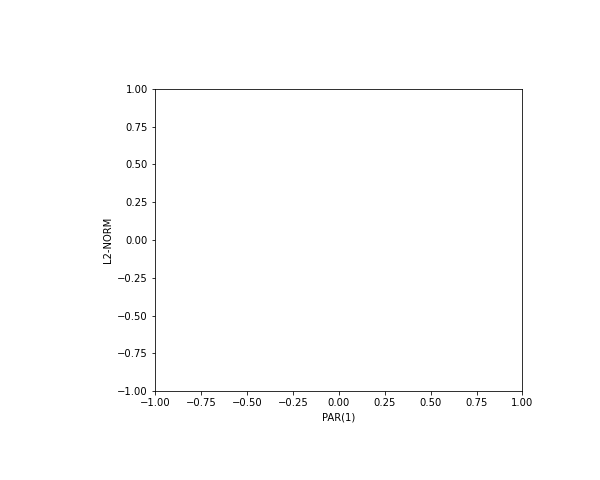

In [44]:
# plot bifurcation diagram using AUTO plot routine

p = ac.plot(r1)
p.config(type='bifurcation')
p.config(grid=False)
p.config(stability=True)
p.savefig('b.png')
display(Image.open('b.png'))

In [41]:
# follow solutions on one of the branches from the main branch of CW solutions

# ISW=-1 performs branch switching
# r1('BP1') indicates first branch point, etc
# r1(51) starts from label 51, etc
r2 = ac.run(r1('BP1'), c='LLE', ISW=-1, NMX=250, DS=0.001, runner=runner)

# extract and save AUTO data

# bifurcation diagram
bd2 = { "par"       : r2[0].coordarray[0,:], 
       "L2norm"     : r2[0].coordarray[1,:]
     }

# individual solutions
sols2 = [ { "u"     : np.array( [ s['U('+str(j)+')'] for j in range(1,5) ]  ),
            "t"     : np.array( s['t'] ), 
            "P"     : s.PAR(1),
            "theta" : s.PAR(2),
            "norm"  : s['L2-NORM']
         } for s in r2() ]

# export to MATLAB
mdic = { 'sols2' : sols2, 'bd2' : bd2 }
savemat('LLEbranch2.mat', mdic)

Starting LLE ...

  BR    PT  TY  LAB    PAR(1)        L2-NORM       MAX U(1)      MAX U(2)      MAX U(3)      MAX U(4)   
   2     3  BP    8   1.40767E+00   1.07102E+00   8.14882E-01  -6.95022E-01   4.85193E-15   1.06643E-15
   2     5  BP    9   1.40767E+00   1.07102E+00   8.14885E-01  -6.95022E-01   3.11340E-15   7.33867E-16
   2    16  BP   10   1.40719E+00   1.07374E+00   8.19305E-01  -6.94017E-01   6.64367E-15   1.25446E-15
   2    20  BP   11   1.40484E+00   1.08601E+00   8.39545E-01  -6.88907E-01   6.37729E-15   1.30968E-15
   2    40  LP   12   1.36083E+00   1.29099E+00   1.22474E+00  -4.08248E-01   1.83877E-14   3.97484E-16
   2    60       13   1.63216E+00   1.53601E+00   1.44552E+00   5.19406E-01   4.21394E-14   2.78815E-14
   2    80       14   2.37053E+00   1.71783E+00   1.24484E+00   1.18377E+00   9.14393E-15   1.22753E-14
   2   100       15   3.52998E+00   1.89108E+00   1.01309E+00   1.59682E+00   5.62789E-15   9.61532E-15
   2   120       16   5.41920E+00   2.09438E+

Created plot


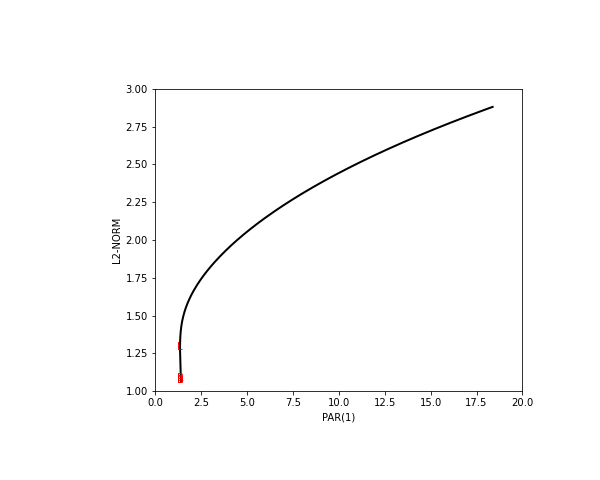

In [42]:
# plot bifurcation diagram using AUTO plot routine

p = ac.plot(r2)
p.config(type='bifurcation')
p.config(grid=False)
p.savefig('b.png')
display(Image.open('b.png'))

In [22]:
# follow solutions on one of the branches from the secondary branch

# ISW=-1 performs branch switching
# r1('BP1') indicates first branch point, etc
# r1(51) starts from label 51, etc
r3 = ac.run(r2('BP3'), c='LLE', ISW=-1, NMX=250, DS=0.01, runner=runner)

# extract and save AUTO data

# bifurcation diagram
bd3 = { "par"       : r3[0].coordarray[0,:], 
       "L2norm"     : r3[0].coordarray[1,:]
     }

# individual solutions
sols3 = [ { "u"     : np.array( [ s['U('+str(j)+')'] for j in range(1,5) ]  ),
            "t"     : np.array( s['t'] ), 
            "P"     : s.PAR(1),
            "theta" : s.PAR(2),
            "norm"  : s['L2-NORM']
         } for s in r3() ]

# export to MATLAB
mdic = { 'sols3' : sols3, 'bd3' : bd3 }
savemat('LLEbranch3.mat', mdic)

Starting LLE ...

  BR    PT  TY  LAB    PAR(1)        L2-NORM       MAX U(1)      MAX U(2)      MAX U(3)      MAX U(4)   
   3     3  BP   39   1.40701E+00   1.07475E+00   8.20990E-01  -6.93626E-01   4.21739E-05   7.59692E-06
   3    10       40   1.40677E+00   1.07609E+00   8.23142E-01  -6.93112E-01   8.23875E-15   1.54627E-15
   3    14  BP   41   1.40603E+00   1.08002E+00   8.29604E-01  -6.91521E-01   4.50268E-15   9.89409E-16
   3    18  BP   42   1.40051E+00   1.10580E+00   8.73104E-01  -6.78586E-01   9.63378E-15   1.84488E-15
   3    20       43   1.38993E+00   1.14691E+00   9.46386E-01  -6.47889E-01   3.57375E-15   7.90425E-16
   3    29  LP   44   1.36083E+00   1.29099E+00   1.22474E+00  -4.08248E-01   9.51529E-14   2.26780E-17
   3    30       45   1.36212E+00   1.31313E+00   1.26590E+00  -3.49009E-01   1.56504E-14   8.23571E-16
   3    40       46   1.52350E+00   1.48890E+00   1.45509E+00   3.15501E-01   8.55231E-15   4.49756E-15
   3    50       47   1.94228E+00   1.62806E+

Created plot


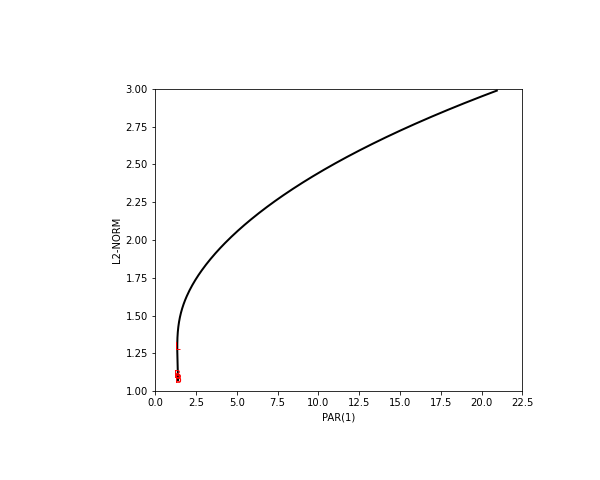

In [23]:
# plot bifurcation diagram using AUTO plot routine

p = ac.plot(r3)
p.config(type='bifurcation')
p.config(grid=False)
p.savefig('b.png')
display(Image.open('b.png'))